<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
df = pd.read_csv("/media/airlines_flights_data.csv")

In [35]:
df.describe()
df.info()
print("null values : " , df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
null values :  index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival

In [36]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [39]:
df.shape
df.head()
df.drop(columns="index")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<Axes: >

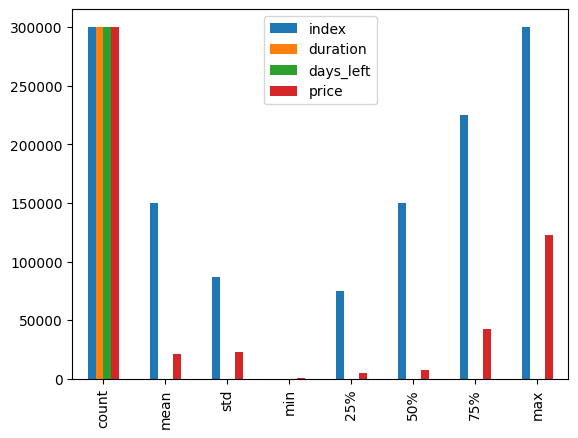

In [40]:
df.describe().plot(kind = "bar")

In [41]:
from sklearn.model_selection import train_test_split


df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [44]:
x_train , x_test, y_train,y_test = train_test_split(
    df.drop("price",axis=1),
    df['price'],
    test_size=0.3,
    random_state =0
)

In [47]:
const_features = [
    features for features in x_train.select_dtypes(include=np.number).columns if x_train[features].std() == 0
]
len(const_features)

0

In [48]:
import numpy as np

quasi_const_fea =[]
for features in x_train.columns :
  predominant = (x_train[features].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]

  if predominant >= 0.999:
    quasi_const_fea.append(features)

len(quasi_const_fea)

0

In [50]:
x_train.drop(labels=quasi_const_fea, axis = 1, inplace = True)
x_test.drop(labels=quasi_const_fea, axis = 1, inplace = True)
print(x_train.shape, x_test.shape)

(210107, 11) (90046, 11)


In [51]:
duplicated_fea=[]
for i in range(0,len(x_train.columns)):
  col1= x_train.columns[i]
  for col2 in x_train.columns[i+1:]:
    if x_train[col1].equals(x_train[col2]):
      duplicated_fea.append(col2)

In [53]:
duplicated_features=set(duplicated_fea)
print(len(duplicated_features))




0


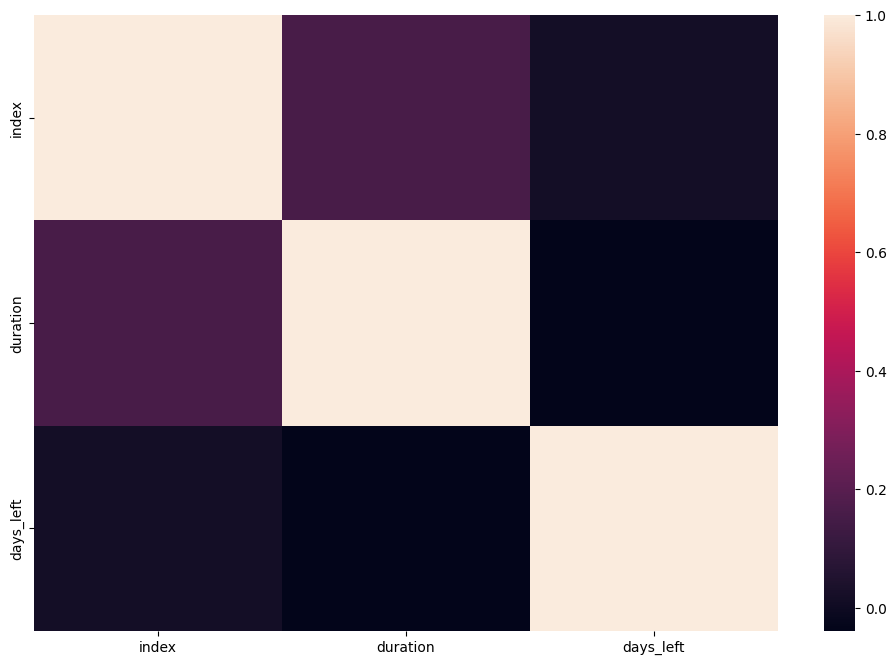

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = x_train.select_dtypes(include=np.number).corr()
fig,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat)
plt.show()

In [64]:
import pandas as pd
df1= pd.read_csv("/media/movies.csv")

In [66]:
df1.describe()
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


,0
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539
